# MOHAMMED REHAN
DATA SCIENCE INTERN@ CODESOFT (ID:CS07WX72568)

TASK-04 "SALES PREDICTION USING PYTHON"

DATASET= ANN CAR SALES PREDICTION

In [77]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings(action='ignore')

In [78]:
#read dataset
cardd=pd.read_csv(r"C:\datasets\car_purchasingcodsoft.csv", encoding='ISO-8859-1')
cardd.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [79]:
cardd.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [80]:
cardd.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [81]:
cardd.dtypes

customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

In [82]:
cardd.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [83]:
cardd.drop(columns=['customer e-mail','customer name','gender','country'],inplace=True)

In [84]:
cardd

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [85]:
cardd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [86]:
cardd.describe()

,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [87]:
cardd.corr()

,age,annual Salary,credit card debt,net worth,car purchase amount
age,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,0.632865,0.617862,0.028882,0.488580,1.000000


# HEATMAP

<Axes: >

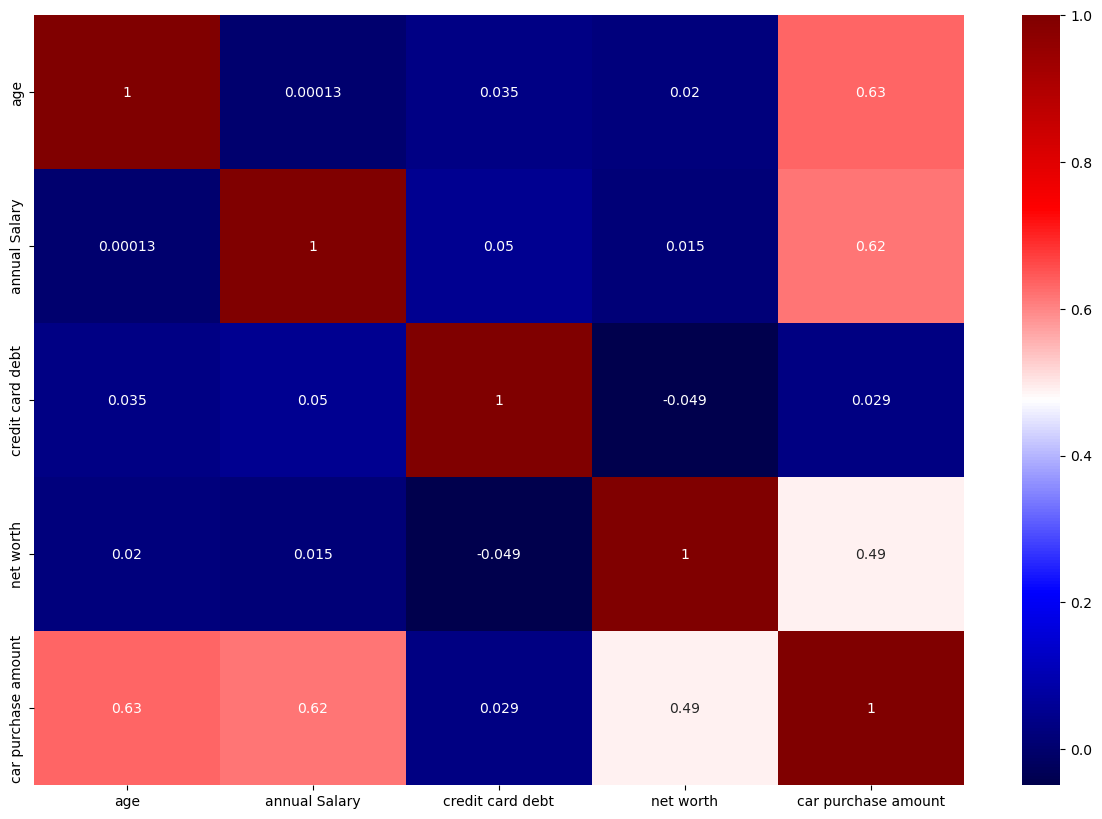

In [88]:
plt.figure(figsize=(15,10))
sns.heatmap(cardd.corr(),cmap='seismic',annot=True)

# TRAINING DATASET

In [89]:
y=cardd['car purchase amount']
x=cardd[['net worth','credit card debt','annual Salary','age','car purchase amount']]

In [90]:
x.shape

(500, 5)

In [91]:
y.shape

(500,)

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 5), (100, 5), (400,), (100,))

# LINEAR REGRESSION

In [94]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [95]:
model.intercept_

4.132743924856186e-09

In [96]:
model.coef_

array([-2.84225186e-15, -4.44089210e-16, -5.51954316e-14, -8.24934146e-11,
        1.00000000e+00])

In [97]:
model.score(x_test,predict)

1.0

In [98]:
cardd= pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predict': predict.flatten()})

cardd.head(20)

,Actual,Predict
0,46082.80993,46082.80993
1,45058.89690,45058.89690
2,63079.84329,63079.84329
3,31837.22537,31837.22537
4,60461.24268,60461.24268
5,63140.05082,63140.05082
6,52477.83479,52477.83479
7,54755.42038,54755.42038
8,52707.96816,52707.96816
9,47869.82593,47869.82593


<function matplotlib.pyplot.show(close=None, block=None)>

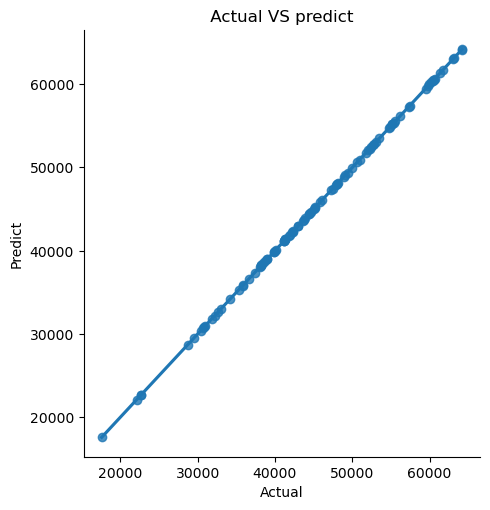

In [101]:
sns.lmplot(x="Actual",y="Predict",data=cardd)
plt.title(" Actual VS predict ")
plt.show

# ACCURACY

In [100]:
from sklearn.metrics import r2_score
r2_score(y_test,predict)

1.0